In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Import data

totalcol = pd.read_csv('totalcol.csv')

In [5]:
#convert remaining categorical values to 0/1 dummy values

totalcol_origin = pd.get_dummies(totalcol)

c = totalcol_origin.corr()

# sort results of correlation by values
c['has_visited'].sort_values().drop_duplicates()

library_onsite_Never            -0.993294
visit_freq_Unknown              -0.439133
broadband_Unknown               -0.258156
email_use_No                    -0.251127
library_website_Never           -0.210241
home_int_Unknown                -0.209376
education_level_No HS           -0.183632
reg_voter_Probably              -0.146200
home_int_No                     -0.135762
education_level_Some HS         -0.130957
mobile_phone_No                 -0.130668
income_<$10K                    -0.128732
race_Hispanic                   -0.127637
smartphone_Unknown              -0.122513
education_level_HS Grad         -0.107284
income_$10K-$20K                -0.096331
sex_Male                        -0.084585
library_onsite_Unknown          -0.082050
is_parent_Unknown               -0.081631
education_level_Unknown         -0.080063
emplnw_Disabled                 -0.078994
smartphone_No                   -0.077471
ideology_Unknown                -0.076320
income_Unknown                  -0

In the visualization portion of the report, some features had components that appeared to have a significant difference for those that had visited the library in the past and those that hadn't.  I decided to test whether or not there was a statistically significant difference using a one sized proportion z test.  

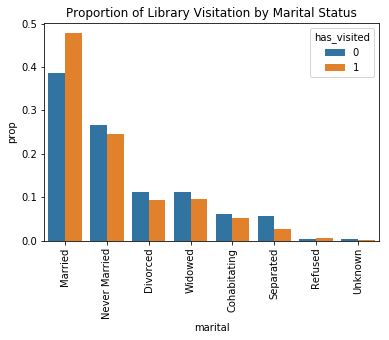

In [6]:
#Visualization of Library Visitation by Marital Status

df = totalcol
x, y, hue = "marital", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Marital Status")
plt.show()

In [7]:
#Numeric values related to Married people visiting the library

x, y, hue = "marital", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

#print(prop_df)

print("Breakdown of Marital Status of Respobdents:", totalcol['marital'].value_counts())
print("Number of Respondents by Visitation:", totalcol['has_visited'].value_counts())
print("Combination of Marital Status and Visitation:", totalcol['has_visited'].groupby(totalcol['marital']).value_counts())
print("Proportion by Marital Status and Visitation:", prop_df)

Married          923
Never Married    501
Widowed          199
Divorced         195
Cohabitating     109
Separated         65
Refused            9
Unknown            3
Name: marital, dtype: int64
1    1639
0     365
Name: has_visited, dtype: int64
marital        has_visited
Cohabitating   1               87
               0               22
Divorced       1              154
               0               41
Married        1              782
               0              141
Never Married  1              404
               0               97
Refused        1                8
               0                1
Separated      1               44
               0               21
Unknown        1                2
               0                1
Widowed        1              158
               0               41
Name: has_visited, dtype: int64
    has_visited        marital      prop
0             0        Married  0.386301
1             0  Never Married  0.265753
2             0       Divo

<h3>First Example</h3><br>

<h4>1 sided z test with a significance level of 0.01</h4>
Is marital status a significant predictor of library visitation?<br>
<br>
<u>Values:</u><br>
Population 1: Married and hasn't visited<br>
Proportion= .386301<br>
n = 365<br>
<br>
Population 2: Married and has visited<br>
Proportion -= .47712<br>
n = 1639<br>
<br>
$H_{0}$ = $P_{1}$ >= $P_{2}$<br>
$H_{alt}$ = $P_{1}$ < $P_{2}$<br>


$\ p = \frac{(p1 * n1 + p2 * n2)}{(n1 + n2)}$<br>

$\ p = \frac{(.386301 * 365 + .47712 * 1639)}{365+1639}$<br>

p=0.4606<br>
<br>
<h4> Standard Error</h4>
$\ SE = \sqrt{p(1-p) * (\frac{1}{n1} + \frac{1}{n2})}$<br>

$\ SE = \sqrt{(0.4606(1-.4606) * (\frac{1}{365} + \frac{1}{1639}))}$<br>
<br>
SE = 0.0288<br>
<br>
<h4> z score </h4>
$\ z = \frac{p1 - p2}{SE}$<br>
$\ z = \frac{.3863 - .47712}{.0288}$<br>
z = -3.15

Probability of a z value of -3.15 = 0.0008<br>
0.0008 is less than 0.01.  The null hypothesis is <b>rejected</b>.<br>
Married people are more likely to go have visited the library than not.

<h3>Second example: Education level - High School Diploma vs Bachelor's Degree</h3>
Is high school graduation a significant predictor of library visitation?

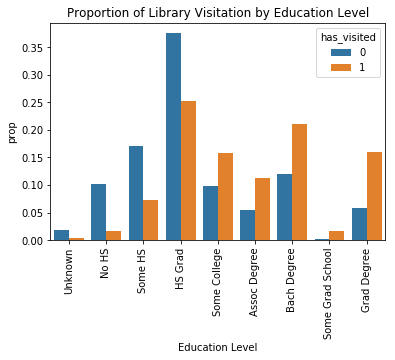

In [8]:
#Library Visitation by Education Level

df = totalcol
x, y, hue = "educ2_ordinal", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(range(9), ['Unknown', 'No HS', 'Some HS', 'HS Grad', 'Some College', 'Assoc Degree', 'Bach Degree', 'Some Grad School', 'Grad Degree'], rotation=90)
_ = plt.xlabel("Education Level")
_ = plt.title("Proportion of Library Visitation by Education Level")
plt.show()

In [10]:
#Numeric values related to Education level of people visiting the library

x, y, hue = "education_level", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

#print(prop_df)

print(totalcol['education_level'].value_counts())
print(totalcol['has_visited'].value_counts())
print(totalcol['has_visited'].groupby(totalcol['education_level']).value_counts())
print(prop_df)

HS Grad             549
Bach Degree         390
Some College        294
Grad School         282
Assoc Degree        204
Some HS             181
No HS                65
Some Grad School     27
Refused               7
Unknown               5
Name: education_level, dtype: int64
1    1639
0     365
Name: has_visited, dtype: int64
education_level   has_visited
Assoc Degree      1              184
                  0               20
Bach Degree       1              346
                  0               44
Grad School       1              261
                  0               21
HS Grad           1              412
                  0              137
No HS             0               37
                  1               28
Refused           1                4
                  0                3
Some College      1              258
                  0               36
Some Grad School  1               26
                  0                1
Some HS           1              119
             

<h3>Second Example</h3><br>

<h4>1 sided z test with a significance level of 0.01</h4>
Is education level a predictor for library visitation?<br>
<br>
<u>Values:</u><br>
Population 1: High school diploma and hasn't visited<br>
Proportion= .375342<br>
n = 365<br>
<br>
Population 2: High school diploma and has visited<br>
Proportion -= .0.251373<br>
n = 1639<br>
<br>
The proportion of visitors with a high school diploma is equal to or greater than those with a high school diploma that don't visit.
$H_{0}$ = $P_{1}$ <= $P_{2}$<br>
The proportion of visitors with a high school diploma is lower that nonvisitors.
$H_{alt}$ = $P_{1}$ > $P_{2}$<br>


$\ p = \frac{(p1 * n1 + p2 * n2)}{(n1 + n2)}$<br>

$\ p = \frac{(.375342 * 365 + .251373 * 1639)}{365+1639}$<br>

p=0.274<br>
<br>
<h4> Standard Error</h4>
$\ SE = \sqrt{p(1-p) * (\frac{1}{n1} + \frac{1}{n2})}$<br>

$\ SE = \sqrt{(0.274(1-0.274) * (\frac{1}{365} + \frac{1}{1639}))}$<br>
<br>
SE = 0.000666<br>
<br>
<h4> z score </h4>
$\ z = \frac{p1 - p2}{SE}$<br>
$\ z = \frac{.375342 - .251373}{.000666}$<br>
z = 186.14

Probability of a z value of 186.14 = 0.0<br>
0.0 is less than 0.01.  The null hypothesis is <b>rejected</b>.<br>
High school graduation status is a significant predictor of library visitation.

In conclusion, based on the statistical analysis above, both marital status and education level should be significant predictors of library visitation.  The model built to predict visitation should have coefficients that weight these features more thn others. 